In [1]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [2]:
WORLD_SIZE = 4
ACTION_PROB = 0.25
REWARD = -1

actions = ['L', 'U', 'R', 'D']
world = np.zeros((WORLD_SIZE, WORLD_SIZE))

In [3]:
next_state = []

for i in range(WORLD_SIZE):
    next_state.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        if i == 0:
            next['U'] = [i, j]
        else:
            next['U'] = [i - 1, j]

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
        else:
            next['D'] = [i + 1, j]

        if j == 0:
            next['L'] = [i, j]
        else:
            next['L'] = [i, j - 1]

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
        else:
            next['R'] = [i, j + 1]

        next_state[i].append(next)
        

In [4]:
states = []

for i in range(WORLD_SIZE):
    for j in range(WORLD_SIZE):
        if (i==0 and j == 0) or (i==WORLD_SIZE-1 and j == WORLD_SIZE-1):
            continue
        else:
            states.append([i, j])
            

In [5]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    plt.show()



Random Policy


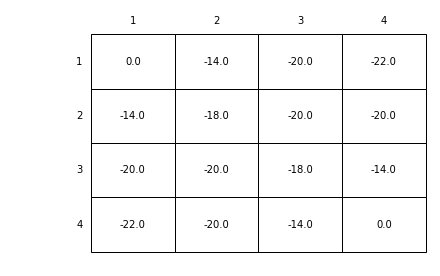

In [6]:

while True:
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i, j in states:
        for action in actions:
            newPosition = next_state[i][j][action]
            newWorld[i, j] += ACTION_PROB * (REWARD + world[newPosition[0], newPosition[1]])
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Random Policy')
        draw_image(np.round(newWorld, decimals=2))
        break
    world = newWorld